In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import andrews_curves
from statsmodels.nonparametric.smoothers_lowess import lowess
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")

In [125]:
#Column renaming according to usual conventions
red_wine.columns=red_wine.columns.str.replace(" ","_")
white_wine.columns=white_wine.columns.str.replace(" ","_")
red_wine["type"]="red"
white_wine["type"]="white"
red_wine.Name="Red wines"
white_wine.name="White wines"
#Categorization of quality into three groups
red_wine["quality_label"] = red_wine["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")
white_wine["quality_label"]=white_wine["quality"].apply(lambda value: "low" if value<=5 else "medium" if value<=7 else "high")
red_wine["quality_label"]=pd.Categorical(red_wine["quality_label"],categories=["low","medium","high"])
white_wine["quality_label"]=pd.Categorical(white_wine["quality_label"],categories=["low","medium","high"])
#Combining the two wine databases
wines=pd.concat([red_wine,white_wine])
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
##FUNCTIONS##

#Creates a boxplot for variables xy to z of winetype dataset. If out==False removes outliers
def boxplotter(x,y,z,winetype,out):
    fig, axes = plt.subplots(1,2, figsize=(10,10),facecolor="snow")
    temp=winetype[[z,x]]
    temp.boxplot(by=z, ax=axes[0],showfliers=out,notch=True,patch_artist=True,color="dimgray");axes[0].set_title(""); axes[0].set_xlabel(z); axes[0].set_ylabel(x)
    temp=winetype[[z,y]]
    temp.boxplot(by=z, ax=axes[1],showfliers=out,notch=True,patch_artist=True,color="dimgray");axes[1].set_title(""); axes[1].set_xlabel(z); axes[1].set_ylabel(y)
    fig.suptitle(winetype.name)

#Normalizes a dataset
def normalizer(df): 
    df=df.drop(["type","quality_label"],axis=1)
    scaler=MinMaxScaler()
    scaler.fit(df)
    scaled=scaler.fit_transform(df)
    scaled_df=pd.DataFrame(scaled,columns=df.columns)
    return scaled_df

#Takes a,b variables for x and y axis respectively. cde are the dataframes and f a boolean vlaue for normalization
def plotter(a,b,c,d,nor):
    if nor:
        c=normalizer(c)
        d=normalizer(d)
    fig, axes = plt.subplots(1,2, figsize=(14,7),facecolor="snow")
    x=sns.regplot(ax=axes[0],x=c[a],y=c[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"})
    y=sns.regplot(ax=axes[1],x=d[a],y=d[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"})
    return x,y

#Graphs relationship between x,y variables on df dataset
def rel_check(x,y,df):
    gg=sns.JointGrid(x=x,y=y,data=df)
    gg=gg.plot_joint(sns.regplot,color="crimson")
    gg=gg.plot_marginals(sns.histplot,kde=True,color="goldenrod")
    return gg

#Used for the removal of outliers
def correction(val,first,ninenine):
    if (val>=first)&(val<=ninenine):
        return val
    else:
        return np.NaN

In [123]:
def exp(df):
    pp = sns.PairGrid(wines)
    pp = pp.map_upper(sns.kdeplot,cmap="hot",shade=True,thresh=False)
    pp = pp.map_diag(plt.hist,color="darkgrey")
    pp = pp.map_lower(sns.scatterplot,color="crimson",edgecolor="k")
    return pp

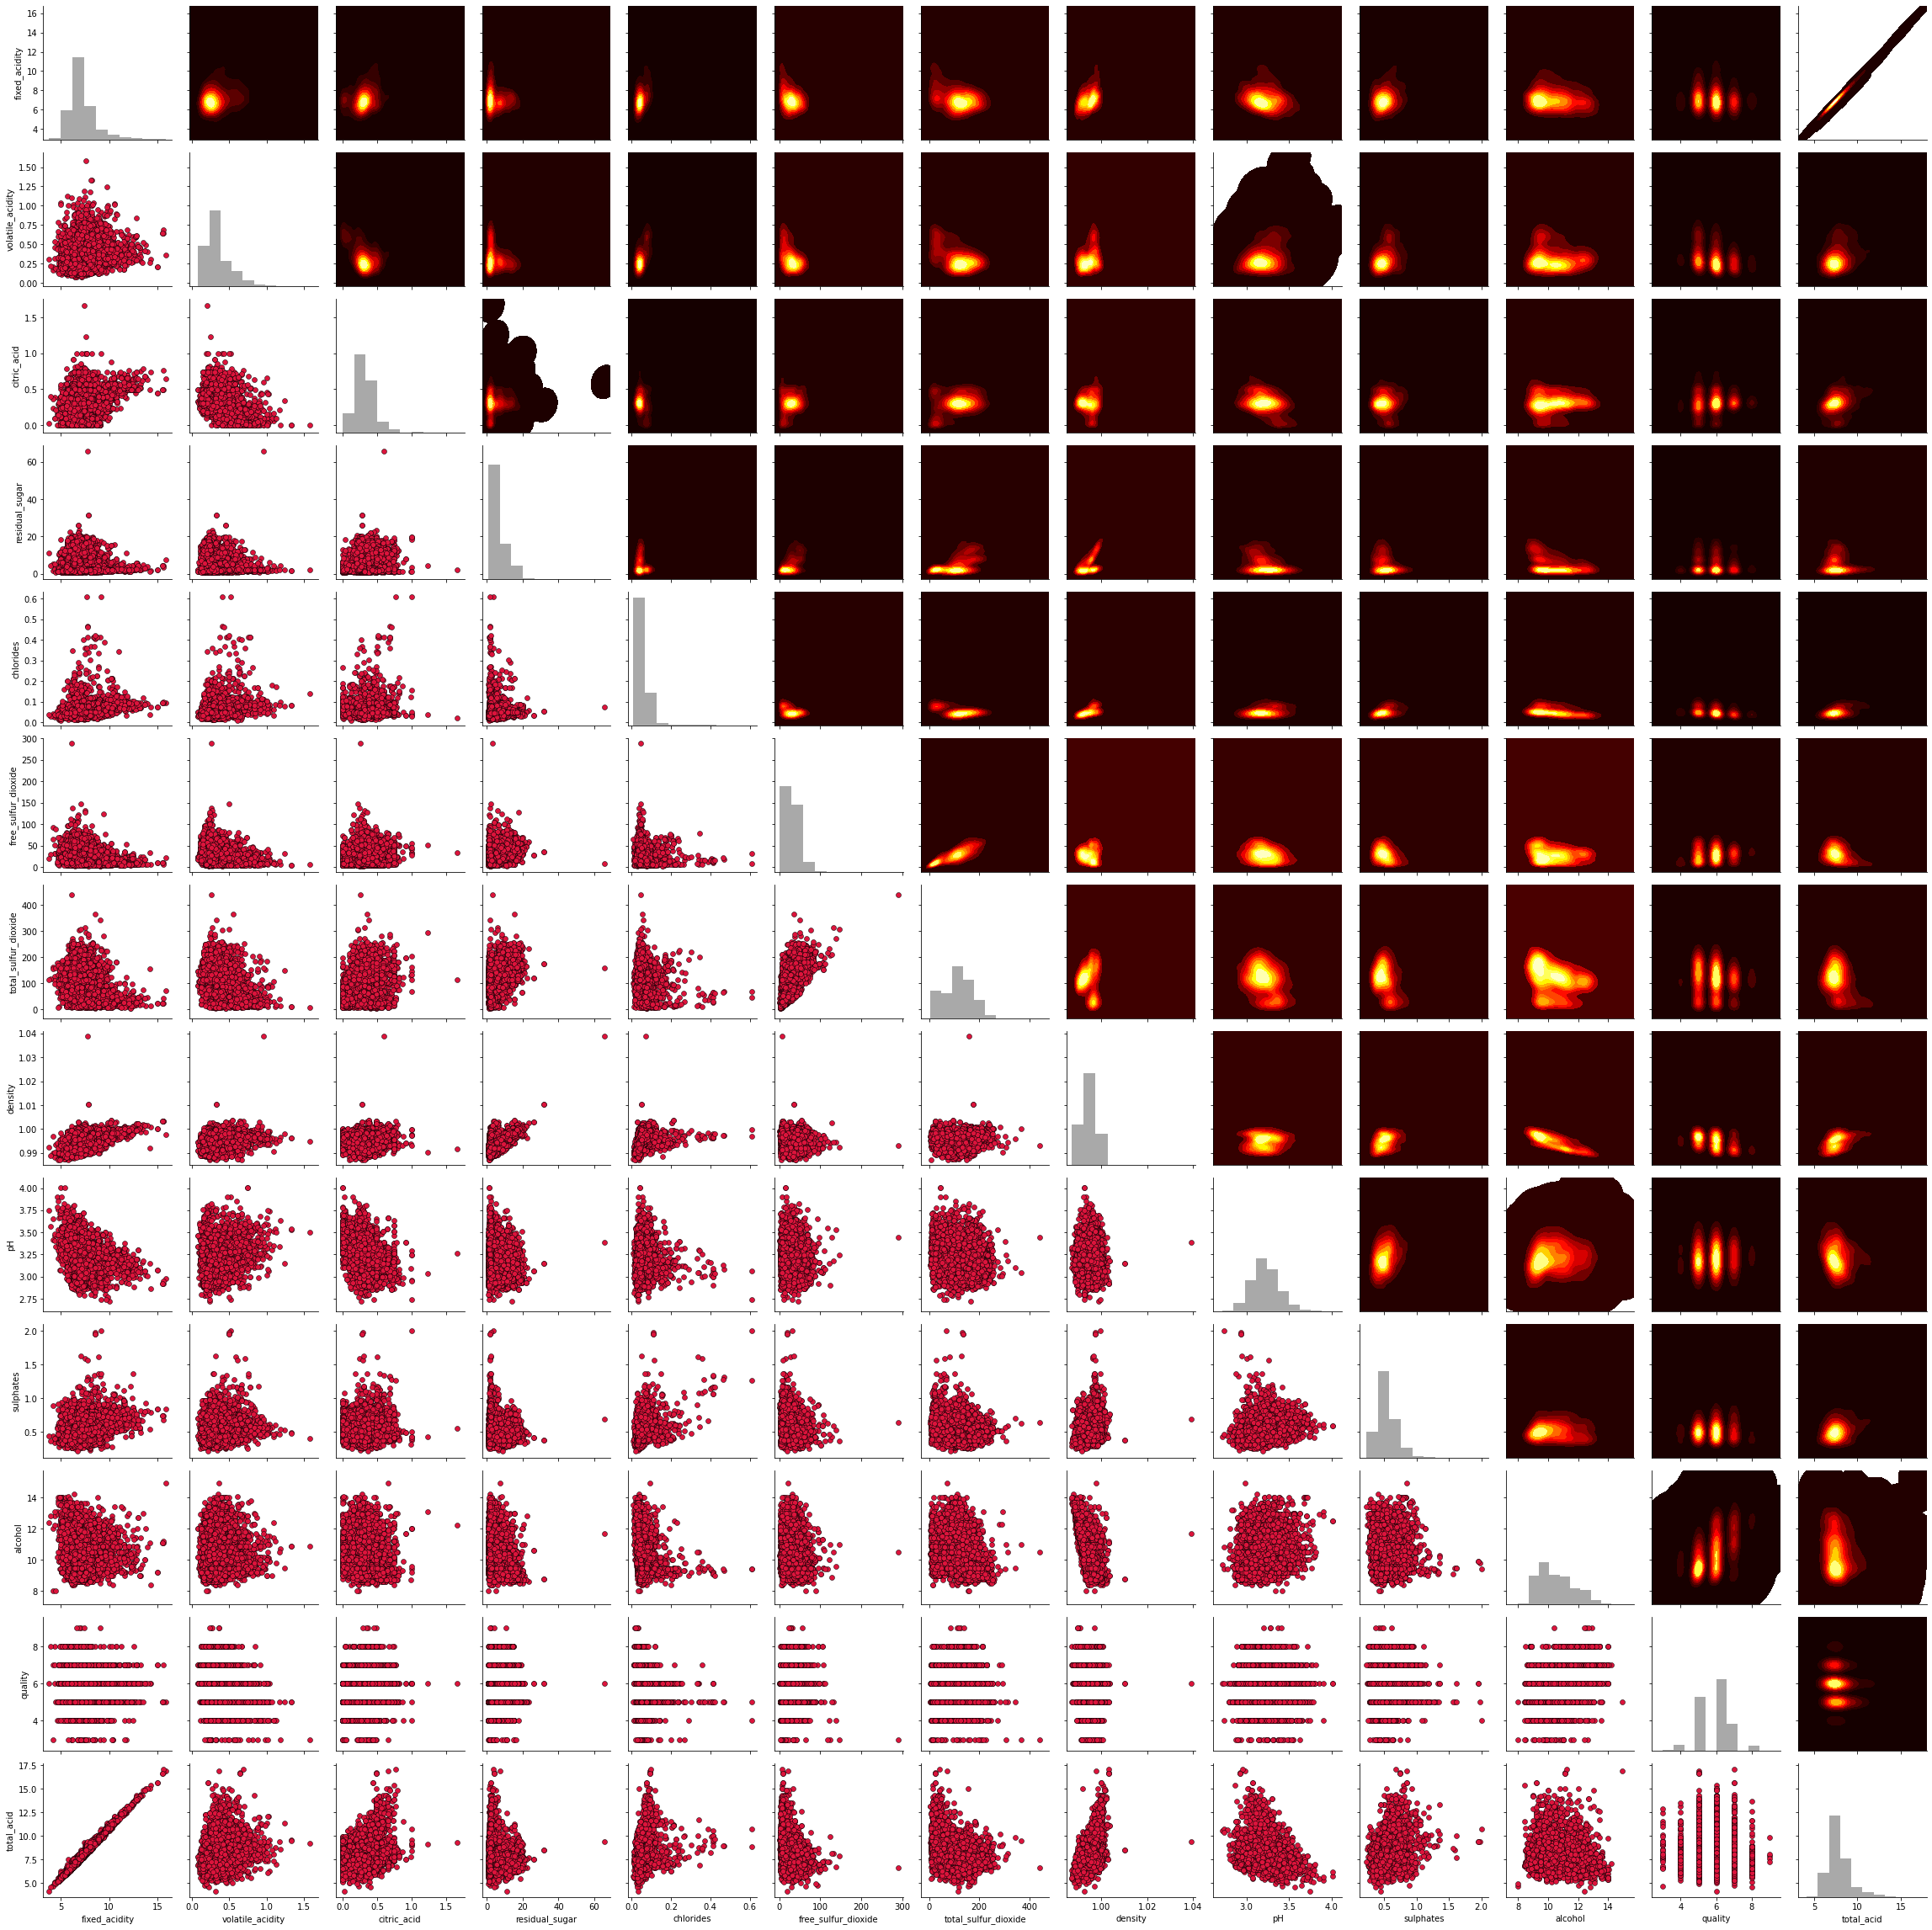

In [126]:
exp(wines)